In [1]:
import matplotlib.pyplot as plt
%matplotlib inline  
%load_ext autoreload
%autoreload 2
import numpy as np
import time
import random
def print_np(x):
    print ("Type is %s" % (type(x)))
    print ("Shape is %s" % (x.shape,))
#     print ("Values are: \n%s" % (x))

In [2]:
import sys
# sys.path.append('../')
sys.path.append('../')
sys.path.append('../model')
sys.path.append('../cost')
sys.path.append('../constraints')
import UnicycleModel
import FinaltimeFreeCost
import UnicycleConstraints
from scipy.integrate import solve_ivp
from PTR_tf_free import PTR_tf_free
from Scaling import TrajectoryScaling

In [40]:
ix = 3
iu = 2
ih = 2
N = 50
tf = 3
delT = tf/N
max_iter = 30

In [41]:
myModel = UnicycleModel.unicycle('Hello',ix,iu,'numeric_central')
myCost = FinaltimeFreeCost.Finaltime('Hello',ix,iu,N)
myConst = UnicycleConstraints.UnicycleConstraints('Hello',ix,iu)

In [42]:
xi = np.zeros(3)
xi[0] = -2.0
xi[1] = -2.0 
xi[2] = 0

xf = np.zeros(3)
xf[0] = 2.0
xf[1] = 2.0
xf[2] = 0


x0 = np.zeros((N+1,ix))
for i in range(N+1) :
    x0[i] = (N-i)/N * xi + i/N * xf
u0 = np.zeros((N+1,iu))

In [43]:
i1 = PTR_tf_free('unicycle',N,tf,max_iter,myModel,myCost,myConst,#myScaling,
          type_discretization="foh",w_c=10,w_vc=1e3,w_tr=2*1e-1,w_rate=0,tol_vc=1e-6,tol_tr=1e-3)
x,u,xbar,ubar,tfbar,total_num_iter,flag_boundary,l,l_vc,l_tr,x_traj,u_traj,T_traj  = i1.run(x0,u0,xi,xf)
print("final time {:}".format(tfbar))

iteration   total_cost        cost        ||vc||     ||tr||       reduction   w_tr        dynamics
1           4019.757          0.000       4           98.8        -4.02e+03   0.200       0(0.114)
2           4031.800          30.000      4           9           -12         0.200       0(0.08)
3           49.878            19.122      1.06e-11    154         3.98e+03    0.200       0(0.0872)
4           30.293            26.191      4.33e-12    20.5        19.6        0.200       0(0.0395)
5           22.055            16.948      5.51e-11    25.5        8.24        0.200       0(0.0353)
6           17.933            16.030      3.46e-12    9.52        4.12        0.200       0(0.00531)
7           16.021            15.870      1.46e-12    0.753       1.91        0.200       1(0.000617)
8           15.839            15.797      2.02e-10    0.206       0.182       0.200       1(0.000166)
9           15.783            15.766      1.35e-10    0.0822      0.0557      0.200       1(6.01e-0

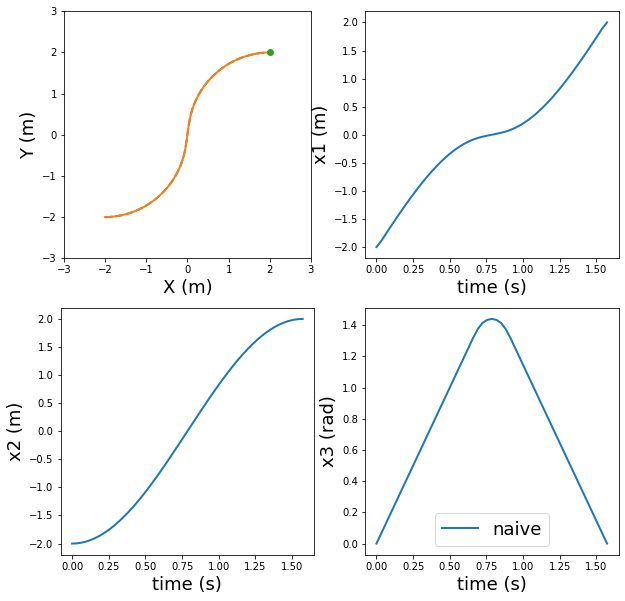

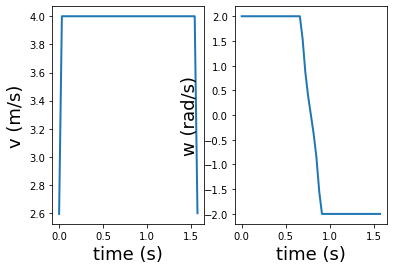

In [44]:
t_index = np.array([i for i in range(N+1)]) / N * tfbar
plt.figure(figsize=(10,10))
fS = 18
plt.subplot(221)
plt.plot(x[:,0], x[:,1],'--', linewidth=2.0)
plt.plot(xbar[:,0], xbar[:,1], linewidth=2.0)
plt.plot(xf[0],xf[1],"o",label='goal')
plt.gca().set_aspect('equal', adjustable='box')
plt.axis([-3, 3, -3, 3])
plt.xlabel('X (m)', fontsize = fS)
plt.ylabel('Y (m)', fontsize = fS)
plt.subplot(222)
plt.plot(t_index, x[:,0], linewidth=2.0,label='naive')
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('x1 (m)', fontsize = fS)
plt.subplot(223)
plt.plot(t_index, x[:,1], linewidth=2.0,label='naive')
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('x2 (m)', fontsize = fS)
plt.subplot(224)
plt.plot(t_index, x[:,2], linewidth=2.0,label='naive')
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('x3 (rad)', fontsize = fS)
plt.legend(fontsize=fS)
plt.show()

plt.figure()
plt.subplot(121)
plt.plot(t_index, u[:,0], linewidth=2.0)
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('v (m/s)', fontsize = fS)
plt.subplot(122)
plt.plot(t_index, u[:,1], linewidth=2.0)
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('w (rad/s)', fontsize = fS)
plt.show()